In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
array_dict = np.load('realPredictedLayers.npy').item()
array_dict

{'TestingPredictedLayer': array([49.,  2.,  2., ..., 55., 37., 34.]),
 'TestingRealLayer': array([50., 46.,  5., ..., 55., 37., 30.]),
 'TestingUniqueZLayer': array([2., 2., 6., ..., 9., 1., 7.]),
 'TrainingPredictedLayer': array([56., 29., 63., ...,  7., 47., 11.]),
 'TrainingRealLayer': array([56., 32., 47., ...,  7., 47., 11.]),
 'TrainingUniqueZLayer': array([ 3.,  1.,  2., ...,  8.,  5., 10.])}

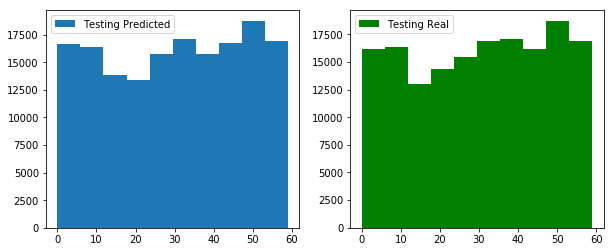

In [4]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (10, 4))
ax1.hist(array_dict['TestingPredictedLayer'], label = 'Testing Predicted')
ax2.hist(array_dict['TestingRealLayer'], label = 'Testing Real', color = 'g')
ax1.legend()
ax2.legend();

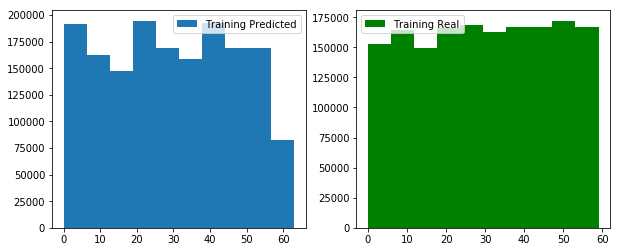

In [5]:
fig2, [ax3, ax4] = plt.subplots(1, 2, figsize = (10, 4))
ax3.hist(array_dict['TrainingPredictedLayer'], label = 'Training Predicted')
ax4.hist(array_dict['TrainingRealLayer'], label = 'Training Real', color = 'g')
ax3.legend()
ax4.legend();

In [6]:
# unique_train, count_train = np.unique(array_dict['TrainingPredictedLayer'], return_counts = True)
# print(np.array(list(zip(unique_train, count_train))))

# unique_test, count_test = np.unique(array_dict['TestingPredictedLayer'], return_counts = True)
# print(np.array(list(zip(unique_test, count_test))))

wrong_train = array_dict['TrainingPredictedLayer'][(array_dict['TrainingPredictedLayer'] != array_dict['TrainingRealLayer']) 
                                                   & (array_dict['TrainingPredictedLayer'] != -1)]
wrong_test = array_dict['TestingPredictedLayer'][(array_dict['TestingPredictedLayer'] != array_dict['TestingRealLayer'])
                                                 & (array_dict['TestingPredictedLayer'] != -1)]

print(len(wrong_train), len(wrong_test))

77098 62344


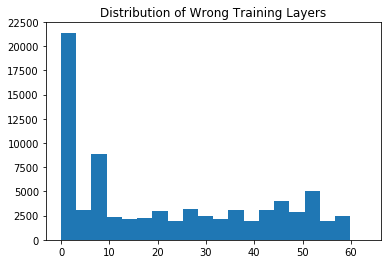

In [7]:
plt.hist(wrong_train, bins=20)
plt.title('Distribution of Wrong Training Layers');

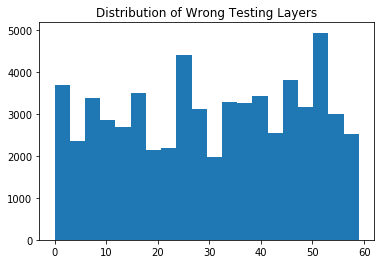

In [9]:
plt.hist(wrong_test, bins=20)
plt.title('Distribution of Wrong Testing Layers');

In [16]:
train_layers = array_dict['TrainingUniqueZLayer']
test_layers = array_dict['TestingUniqueZLayer']

print(np.unique(train_layers))
print(np.unique(test_layers))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 36. 38.
 42.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 28. 29.]


In [12]:
def return_train_acc(layers):
    result = 0
    count = 0
    length = len(array_dict['TrainingUniqueZLayer'])
    for i in range(length - 1):
        if array_dict['TrainingUniqueZLayer'][i] == num:
            count += 1
            if array_dict['TrainingPredictedLayer'][i] == array_dict['TrainingRealLayer'][i]:
                result += 1
    return result/count

def return_test_acc(layers):
    result = 0
    count = 0
    length = len(array_dict['TestingUniqueZLayer'])
    for i in range(length - 1):
        if array_dict['TestingUniqueZLayer'][i] == num:
            count += 1
            if array_dict['TestingPredictedLayer'][i] == array_dict['TestingRealLayer'][i]:
                result += 1
    return result/count

train_x = []
test_x = []
train_acc = []
test_acc = []

for num in np.unique(train_layers):
    train = return_train_acc(num)
    train_x.append(num)
    train_acc.append(train)

for num in np.unique(test_layers):
    test = return_test_acc(num)
    test_x.append(num)
    test_acc.append(test)

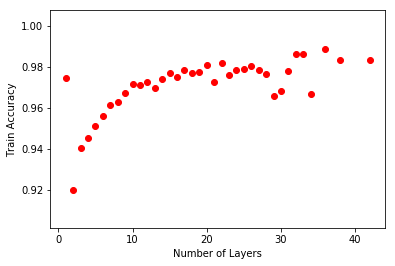

In [17]:
plt.scatter(train_x, train_acc, color = 'r')
plt.xlabel('Number of Layers')
plt.ylabel('Train Accuracy');

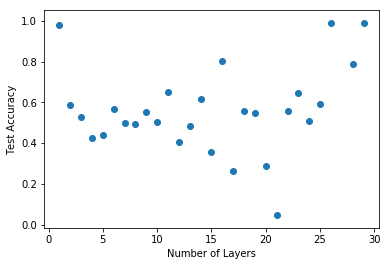

In [18]:
plt.scatter(test_x, test_acc)
plt.xlabel('Number of Layers')
plt.ylabel('Test Accuracy');